## <p style="text-align: center;">**Laboratory Session** : May 28, 2024</p>
#### <p style="text-align: center;">Exercises due on : June 10, 2024</p>

**Student**: Cavezza Lorenzo <br>
**Matricola**: 2130648

In [197]:
library("glue")
library("lubridate")
library(ggplot2)
library(tidyverse)
library(actuar)
library("R2jags")
library(rstan)

### Exercise 1

- Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the
Poisson distribution can be very useful in applied statistics when describing low-frequency events
in a large population. In a famous example he showed that the number of deaths by horse kick
among the Prussian army follows the Poisson distribution.

- Considering the following to sets of observations taken over a fixed large time interval in two different
corps:

y death soldiers 0 1 2 3 4 ≥ 5<br>
n1 observations 109 65 22 3 1 0<br>
n2 observations 144 91 32 11 2 0

(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

In [210]:
n1ob<-c(rep(0,109),rep(1,65),rep(2,22),rep(3,3),rep(4,1))
n2ob<-c(rep(0,144),rep(1,91),rep(2,32),rep(3,11),rep(4,2))
totob<-c(n1ob,n2ob)
step<-0.001
x_axis<-seq(0,4,step)
prior<-1
posterior<-dgamma(x_axis,sum(totob)+1,length(totob)) #assuming poisson likelihood
cumposterior<-cumsum(posterior*step)
mean<-sum(posterior*x_axis)*step
median<-x_axis[which(abs(cumposterior-0.5) == min(abs(cumposterior-0.5)))]
variance<-sum((mean-x_axis)^2*posterior)*step
lower_bound<-x_axis[which(abs(cumposterior-0.025) == min(abs(cumposterior-0.025)))]
upper_bound<-x_axis[which(abs(cumposterior-0.975) == min(abs(cumposterior-0.975)))]

Warning message:
“Removed 3400 rows containing missing values or values outside the scale range (`geom_line()`).”


The mean is 0.665 
The median is 0.663 
The variance is 0.0014 
The 95% credibility interval is 0.593 - 0.739

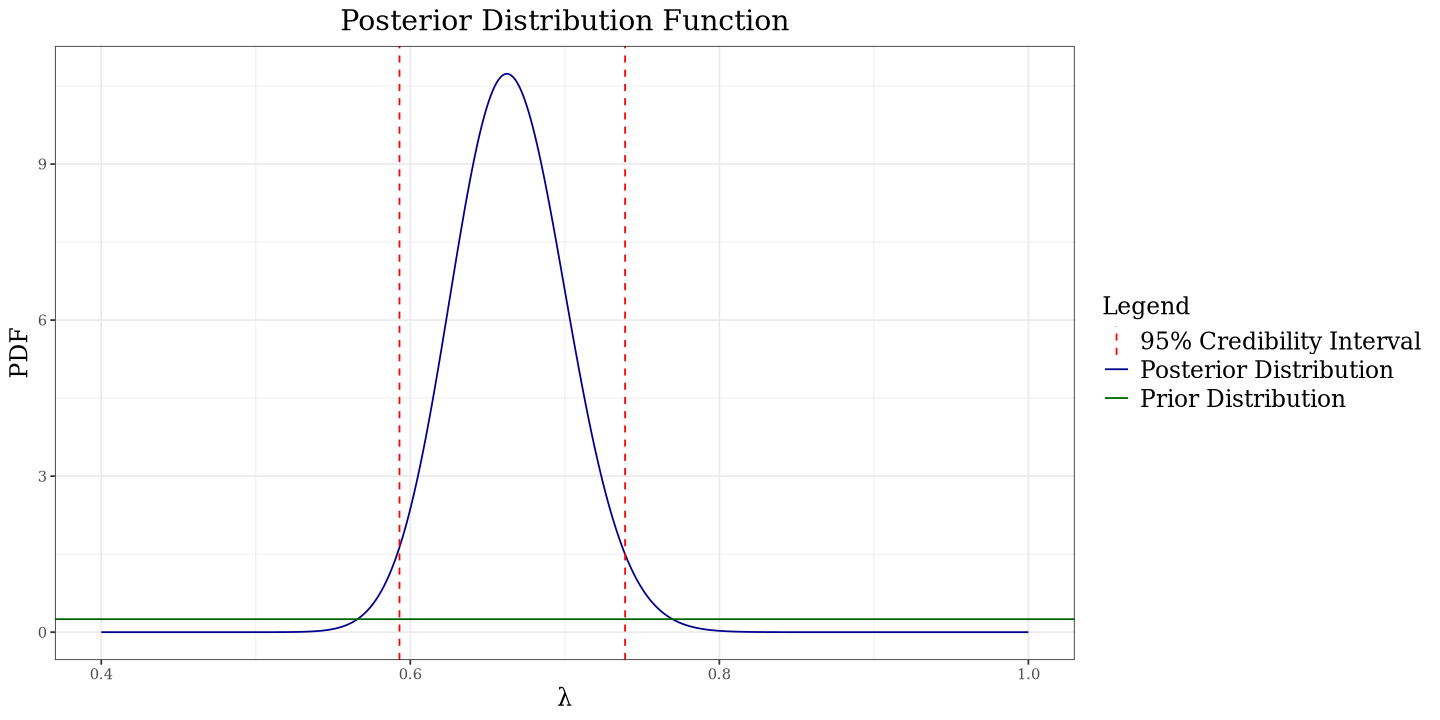

In [211]:
options(repr.plot.width = 12,repr.plot.height = 6)
g<-ggplot()+
geom_line(data=data.frame(x_axis,posterior), aes(x=x_axis, y=posterior, colour="Posterior Distribution",group=1))+
geom_hline(aes(yintercept=0.25,color="Prior Distribution"))+
geom_vline(data=tibble(lines=c(lower_bound,upper_bound)),aes(xintercept=lines,colour='95% Credibility Interval'),linetype=2)+
#geom_line(aes(x=upper_bound),linetype=2)+
scale_color_manual(name = "Legend", values = c("Posterior Distribution" = "darkblue", "Prior Distribution" ="darkgreen", "95% Credibility Interval"="red"))+
xlim(0.4,1)+
labs(
title="Posterior Distribution Function",
y="PDF",
x="λ",
)

#axis_legend()
g+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),legend.text=element_text(size=14),legend.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

cat("The mean is",round(mean,3),"\n")
cat("The median is",round(median,3),"\n")
cat("The variance is",round(variance,4),"\n")
cat("The 95% credibility interval is",lower_bound,"-",upper_bound)

(b) assuming now a Jeffreys’ prior,<br>
g(λ) ∝ 1/√λ , with λ > 0<br>
compute and plot the posterior distribution for λ, the death rate over the measurement time.
Determine the posterior mean, median and variance, and compute the 95% credibility interval

In [212]:
Jprior <- 1/sqrt(x_axis)
Jposterior <- prior * posterior
normalization <- sum(Jposterior*step)
Jposterior <- Jposterior / normalization
Jcumposterior<-cumsum(Jposterior*step)
Jmean<-sum(Jposterior*x_axis)*step
Jmedian<-x_axis[which(abs(Jcumposterior-0.5) == min(abs(Jcumposterior-0.5)))]
Jvariance<-sum((Jmean-x_axis)^2*Jposterior)*step
Jlower_bound<-x_axis[which(abs(Jcumposterior-0.025) == min(abs(Jcumposterior-0.025)))]
Jupper_bound<-x_axis[which(abs(Jcumposterior-0.975) == min(abs(Jcumposterior-0.975)))]

Warning message:
“Removed 3400 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 3400 rows containing missing values or values outside the scale range (`geom_line()`).”


The mean is 0.665 
The median is 0.663 
The variance is 0.0014 
The 95% credibility interval is 0.593 - 0.739

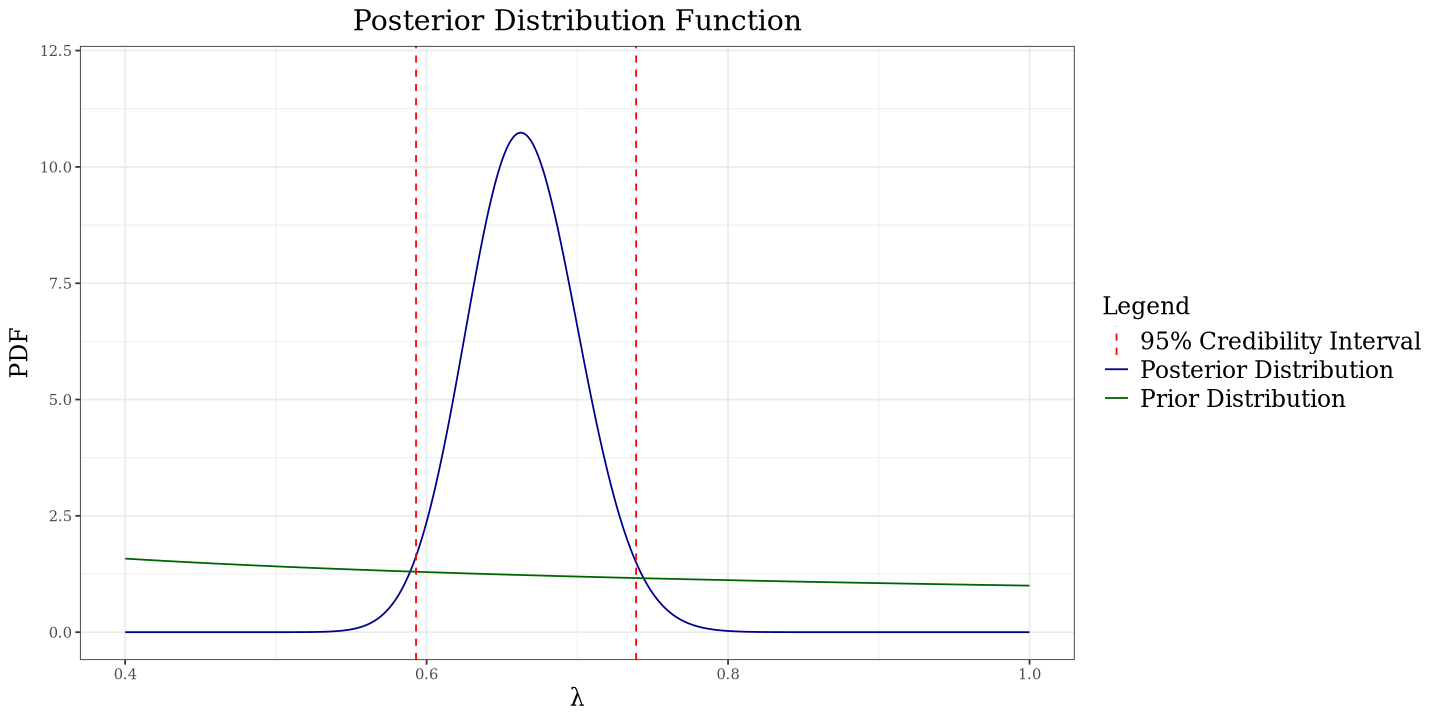

In [213]:
options(repr.plot.width = 12,repr.plot.height = 6)
g<-ggplot()+
geom_line(data=data.frame(x_axis,Jposterior), aes(x=x_axis, y=Jposterior, colour="Posterior Distribution",group=1))+
geom_line(data=data.frame(x_axis,Jprior),aes(x=x_axis,y=Jprior,color="Prior Distribution"))+
geom_vline(data=tibble(lines=c(Jlower_bound,Jupper_bound)),aes(xintercept=lines,colour='95% Credibility Interval'),linetype=2)+
#geom_line(aes(x=upper_bound),linetype=2)+
scale_color_manual(name = "Legend", values = c("Posterior Distribution" = "darkblue", "Prior Distribution" ="darkgreen", "95% Credibility Interval"="red"))+
xlim(0.4,1)+
ylim(0,12)+
labs(
title="Posterior Distribution Function",
y="PDF",
x="λ",
)

#axis_legend()
g+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),legend.text=element_text(size=14),legend.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

cat("The mean is",round(Jmean,3),"\n")
cat("The median is",round(Jmedian,3),"\n")
cat("The variance is",round(Jvariance,4),"\n")
cat("The 95% credibility interval is",Jlower_bound,"-",Jupper_bound)

### Exercise 2

- solve Exercise 1 using a Markov Chain Monte Carlo using stan.

Warning message in readLines(file, warn = TRUE):
“incomplete final line found on '/mnt/c/Users/loryc/Documents/AdvStat/poisson.stan'”



SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: Rejecting initial value:
Chain 1:   Log probability evaluates to log(0), i.e. negative infinity.
Chain 1:   Stan can't start sampling from this initial value.
Chain 1: 
Chain 1: Gradient evaluation took 2.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 1001 / 10000 [ 10%]  (Sampling)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Sampling)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)

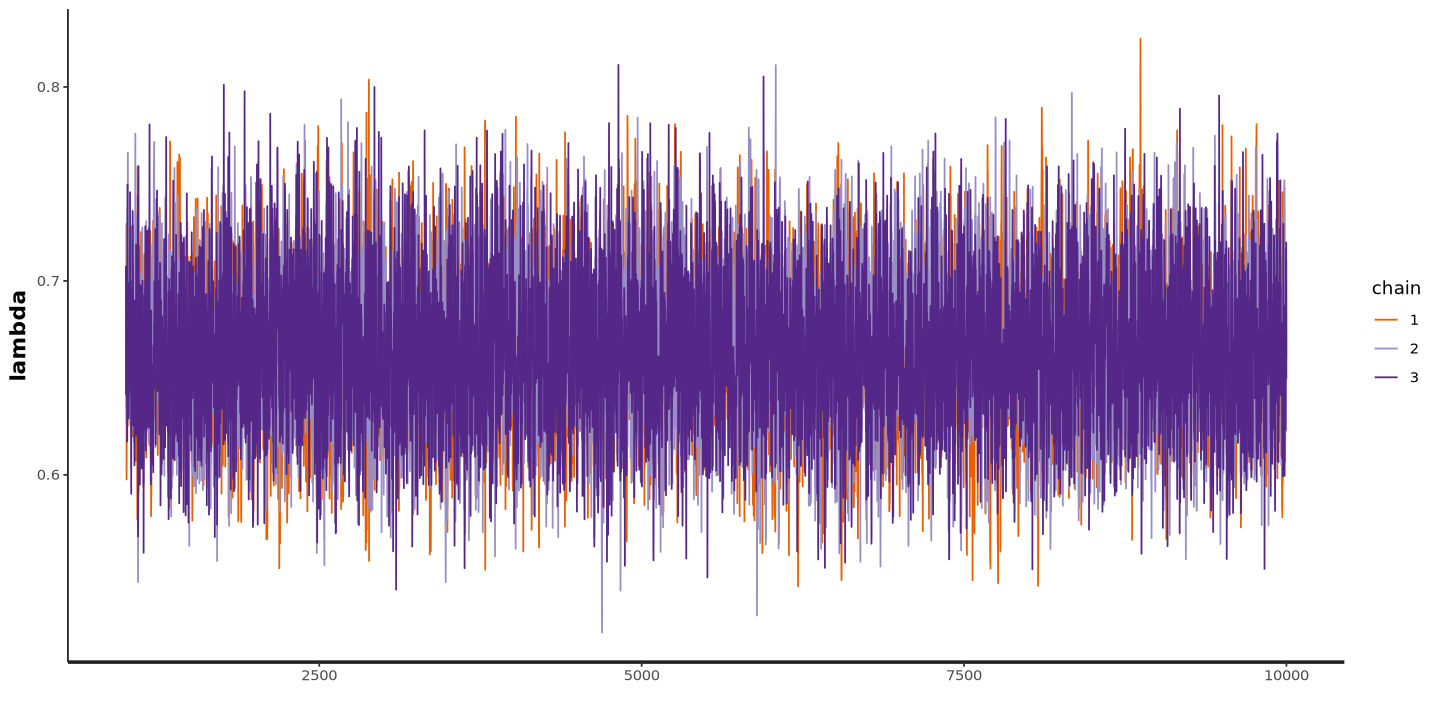

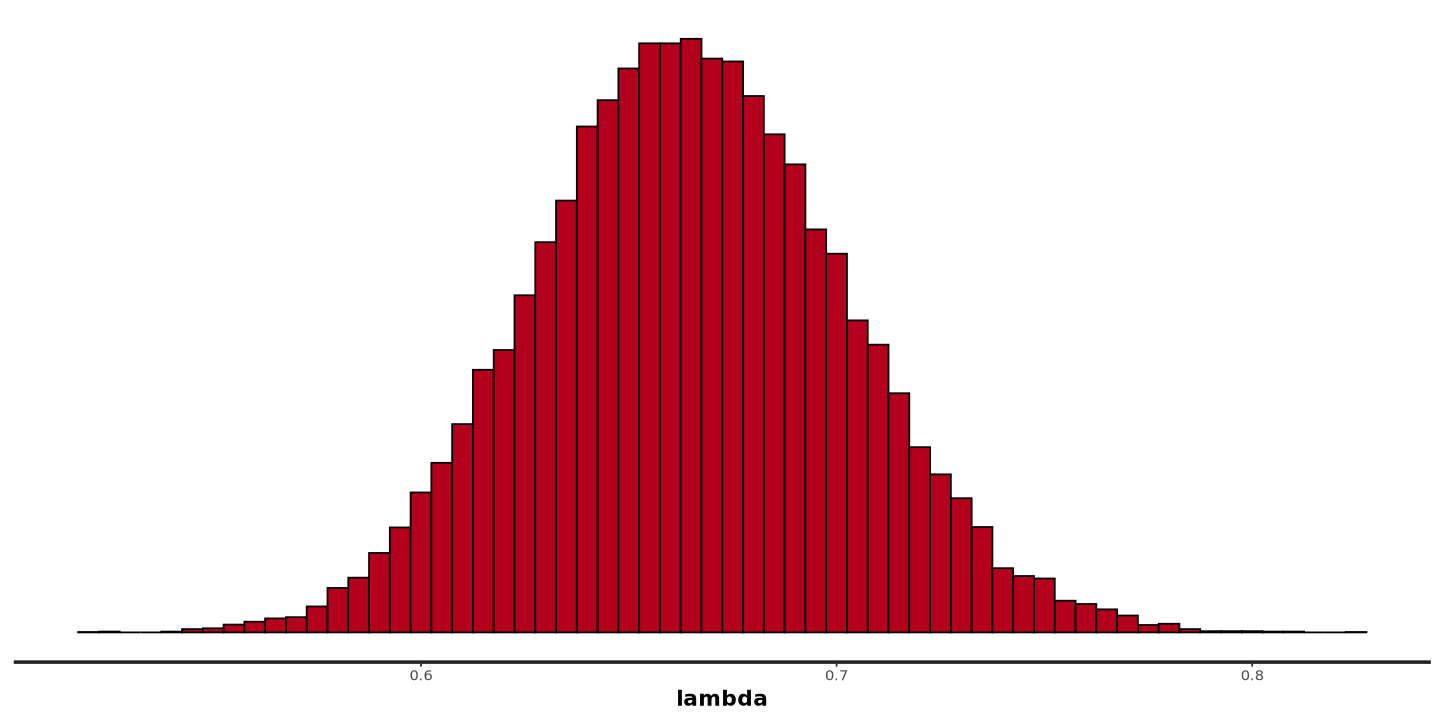

In [214]:
stan_unif <- stan_model(file = 'poisson.stan')
y <- totob
N <- length(y)
dataList <- list(y = y , N = N)
stanFit <- sampling(object = stan_unif,data = dataList, chains = 3, iter = 10000, warmup = 1000, thin = 1)
stan_trace(stanFit)   
stan_hist(stanFit, binwidth = 0.005 )      

### Exercise 3

- A study on water quality of streams, a high level of bacter X was defined as a level greater than 100
per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental
impact on pandas. Out of these, y = 11 had a high bacter X level.
- indicating with p the probability that a sample of water taken from the stream has a high bacter
X level,

(a) find the frequentist estimator for p

In [216]:
n <- 116
y <- 11
pfreq <- y/n
varfreq <- pfreq*(1-pfreq)/n
cat('The frequentist estimator for p is ', round(pfreq,3), '+/-', round(sqrt(varfreq),3))

The frequentist estimator for p is  0.095 +/- 0.027

(b) using a Beta(1, 10) prior for p, calculate and posterior distribution P (p ∣
∣ y) <br>(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [217]:
step=0.001
p<-seq(0,1,step)
prior <- dbeta(p, 1,10)
posterior <- dbeta(p, 1 + y, 10 + n - y)
cumposterior<-cumsum(posterior*step)
mean<-sum(posterior*p)*step
median<-x_axis[which(abs(cumposterior-0.5) == min(abs(cumposterior-0.5)))]
variance<-sum((mean-p)^2*posterior)*step
lower_bound<-x_axis[which(abs(cumposterior-0.025) == min(abs(cumposterior-0.025)))]
upper_bound<-x_axis[which(abs(cumposterior-0.975) == min(abs(cumposterior-0.975)))]

The mean is 0.094 
The median is 0.092 
The variance is 0.00067 
The 95% credibility interval is 0.05 - 0.15 
The bayesian estimator for p is  0.094 +/- 0.026

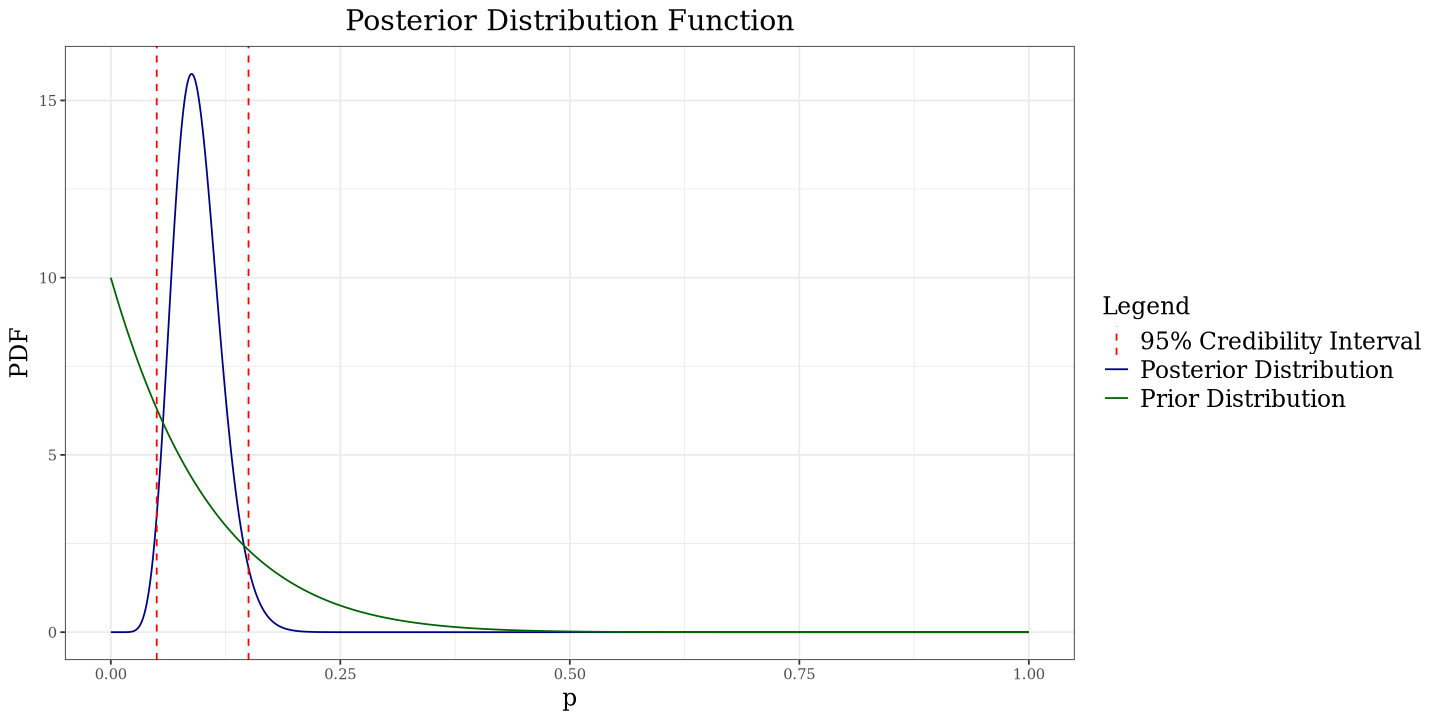

In [219]:
options(repr.plot.width = 12,repr.plot.height = 6)
g<-ggplot()+
geom_line(data=data.frame(p,posterior), aes(x=p, y=posterior, colour="Posterior Distribution",group=1))+
geom_line(data=data.frame(p,prior), aes(x=p, y=prior, colour="Prior Distribution"))+
geom_vline(data=tibble(lines=c(lower_bound,upper_bound)),aes(xintercept=lines,colour='95% Credibility Interval'),linetype=2)+
scale_color_manual(name = "Legend", values = c("Posterior Distribution" = "darkblue", "Prior Distribution" ="darkgreen", "95% Credibility Interval"="red"))+
labs(
title="Posterior Distribution Function",
y="PDF",
x="p",
)

#axis_legend()
g+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),legend.text=element_text(size=14),legend.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

cat("The mean is",round(mean,3),"\n")
cat("The median is",round(median,3),"\n")
cat("The variance is",round(variance,5),"\n")
cat("The 95% credibility interval is",lower_bound,"-",upper_bound,"\n")
cat("The bayesian estimator for p is ",round(mean,3),"+/-",round(sqrt(variance),3))

(d) test the hypotesis
H◦ : p = 0.1 versus H1 : p  /= 0.1
at 5% level of significance with both the frequentist and bayesian approach

In [231]:
binom.test(x=y, n=n, p=0.1)


	Exact binomial test

data:  y and n
number of successes = 11, number of trials = 116, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.04829409 0.16333954
sample estimates:
probability of success 
            0.09482759 


- a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter
X level

(e) find the frequentist estimator for p

In [222]:
newy <- 9
newn <- 165
newpfreq <- newy/newn
varfreq <- newpfreq*(1-newpfreq)/newn
cat('The frequentist estimator for p is ', round(newpfreq,3), '+/-', round(sqrt(varfreq),3))

The frequentist estimator for p is  0.055 +/- 0.018

(f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one. <br>
(g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [223]:
step=0.001
p = seq(0,1,step)
prior <- dbeta(p, 1,10)
posterior <- dbeta(p, 1 + newy, 10 + newn - newy)
cumposterior<-cumsum(posterior*step)
mean<-sum(posterior*p)*step
median<-x_axis[which(abs(cumposterior-0.5) == min(abs(cumposterior-0.5)))]
variance<-sum((mean-p)^2*posterior)*step
lower_bound<-x_axis[which(abs(cumposterior-0.025) == min(abs(cumposterior-0.025)))]
upper_bound<-x_axis[which(abs(cumposterior-0.975) == min(abs(cumposterior-0.975)))]

Warning message:
“Removed 500 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 500 rows containing missing values or values outside the scale range (`geom_line()`).”


The mean is 0.057 
The median is 0.055 
The variance is 3e-04 
The 95% credibility interval is 0.027 - 0.095 
The bayesian estimator for p is  0.057 +/- 0.017

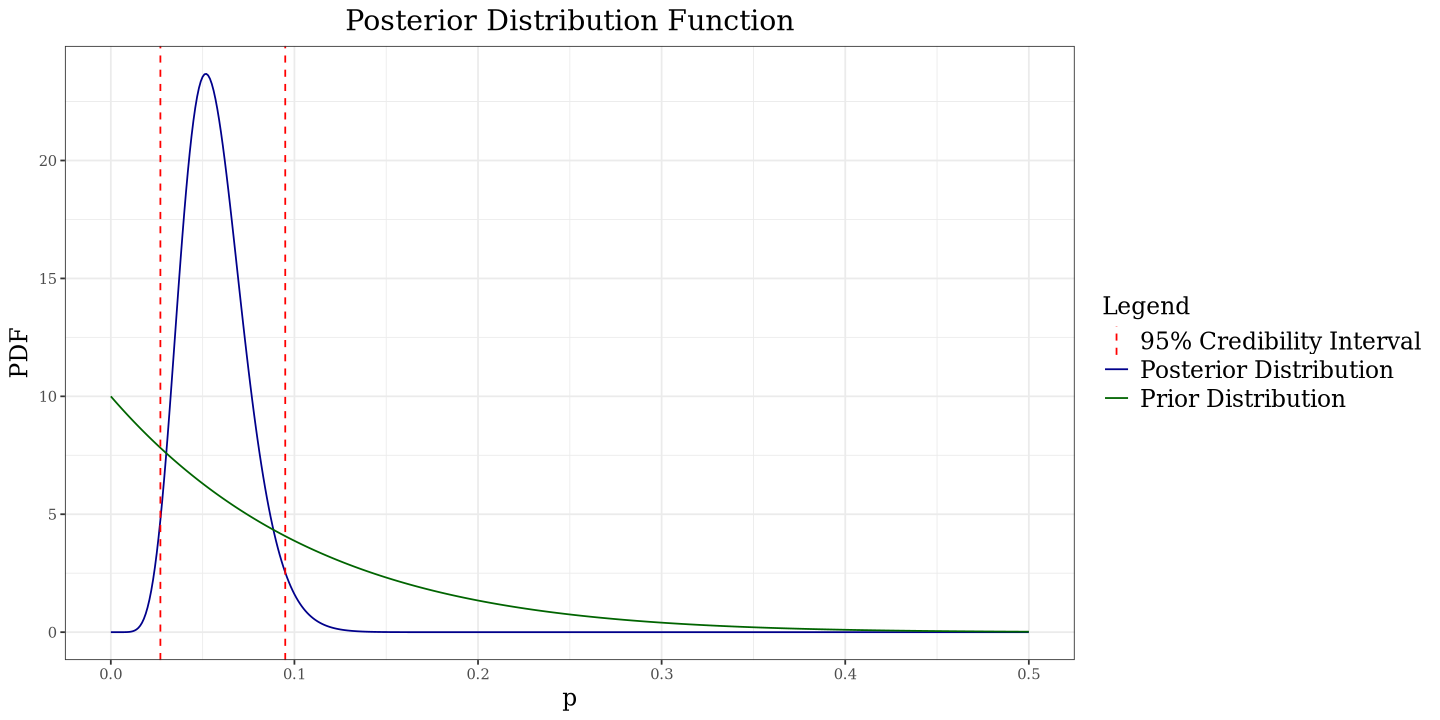

In [225]:
options(repr.plot.width = 12,repr.plot.height = 6)
g<-ggplot()+
geom_line(data=data.frame(p,posterior), aes(x=p, y=posterior, colour="Posterior Distribution",group=1))+
geom_line(data=data.frame(p,prior), aes(x=p, y=prior, colour="Prior Distribution"))+
geom_vline(data=tibble(lines=c(lower_bound,upper_bound)),aes(xintercept=lines,colour='95% Credibility Interval'),linetype=2)+
scale_color_manual(name = "Legend", values = c("Posterior Distribution" = "darkblue", "Prior Distribution" ="darkgreen", "95% Credibility Interval"="red"))+
xlim(0,0.5)+
labs(
title="Posterior Distribution Function",
y="PDF",
x="p",
)

#axis_legend()
g+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),legend.text=element_text(size=14),legend.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

cat("The mean is",round(mean,3),"\n")
cat("The median is",round(median,3),"\n")
cat("The variance is",round(variance,5),"\n")
cat("The 95% credibility interval is",lower_bound,"-",upper_bound,"\n")
cat("The bayesian estimator for p is ",round(mean,3),"+/-",round(sqrt(variance),3))

In [226]:
prior <- posterior
likelihood <- dbinom(x = newy, size = newn, prob = p)
posterior <- prior*likelihood
norm <- sum(posterior*step)
posterior <- posterior/norm
cumposterior<-cumsum(posterior*step)
mean<-sum(posterior*p)*step
median<-x_axis[which(abs(cumposterior-0.5) == min(abs(cumposterior-0.5)))]
variance<-sum((mean-p)^2*posterior)*step
lower_bound<-x_axis[which(abs(cumposterior-0.025) == min(abs(cumposterior-0.025)))]
upper_bound<-x_axis[which(abs(cumposterior-0.975) == min(abs(cumposterior-0.975)))]

Warning message:
“Removed 800 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 800 rows containing missing values or values outside the scale range (`geom_line()`).”


The mean is 0.056 
The median is 0.054 
The variance is 0.00015 
The 95% credibility interval is 0.033 - 0.082 
The bayesian estimator for p is  0.056 +/- 0.012

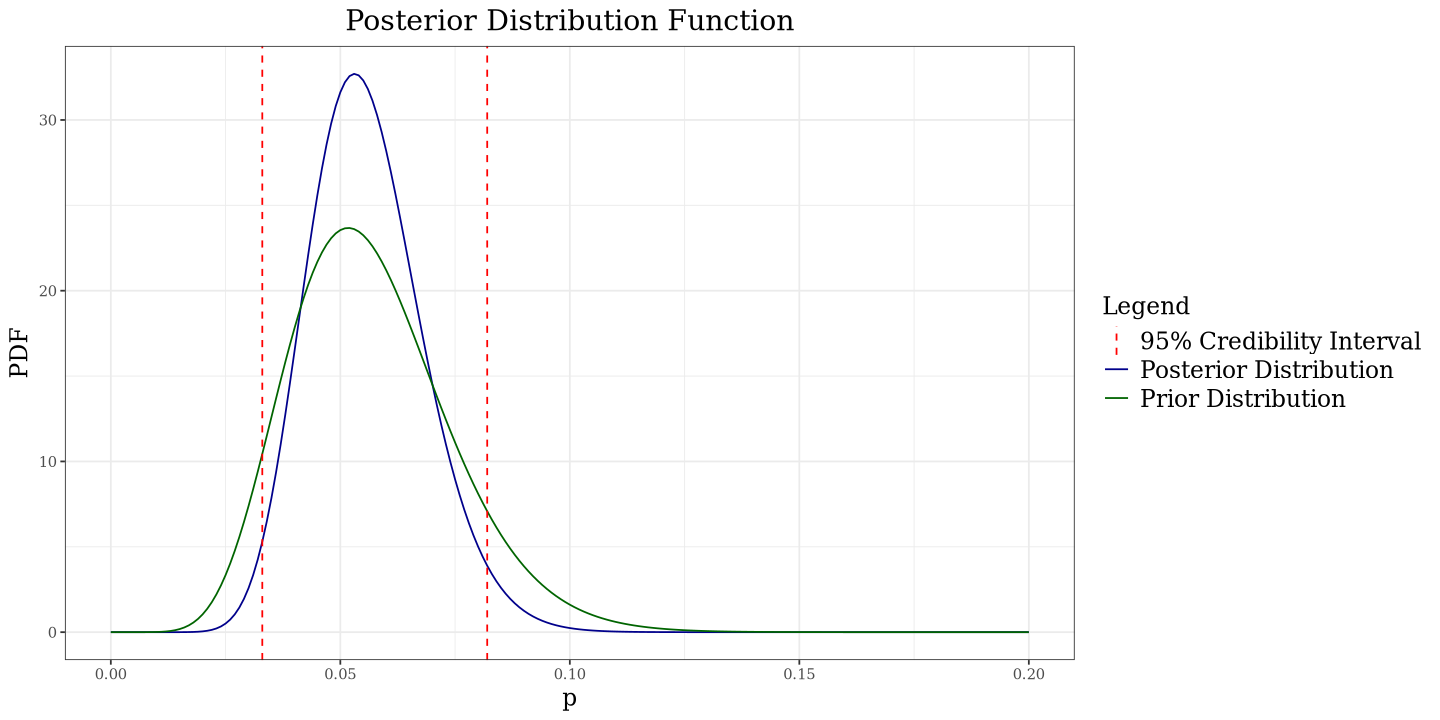

In [229]:
options(repr.plot.width = 12,repr.plot.height = 6)
g<-ggplot()+
geom_line(data=data.frame(p,posterior), aes(x=p, y=posterior, colour="Posterior Distribution",group=1))+
geom_line(data=data.frame(p,prior), aes(x=p, y=prior, colour="Prior Distribution"))+
geom_vline(data=tibble(lines=c(lower_bound,upper_bound)),aes(xintercept=lines,colour='95% Credibility Interval'),linetype=2)+
scale_color_manual(name = "Legend", values = c("Posterior Distribution" = "darkblue", "Prior Distribution" ="darkgreen", "95% Credibility Interval"="red"))+
xlim(0,0.2)+
labs(
title="Posterior Distribution Function",
y="PDF",
x="p",
)

#axis_legend()
g+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),legend.text=element_text(size=14),legend.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

cat("The mean is",round(mean,3),"\n")
cat("The median is",round(median,3),"\n")
cat("The variance is",round(variance,5),"\n")
cat("The 95% credibility interval is",lower_bound,"-",upper_bound,"\n")
cat("The bayesian estimator for p is ",round(mean,3),"+/-",round(sqrt(variance),3))

(h) test the hypotesis
H◦ : p = 0.1 versus H1 : p /= 0.1
at 5% level of significance with both the frequentist and bayesian approach

In [230]:
binom.test(x=newy, n=newn, p=0.1)


	Exact binomial test

data:  newy and newn
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


### Exercise 4

- analyze the data of Exercise 3 and solve points (b) and (c) using a Markov Chain Monte Carlo
using stan.

Warning message in readLines(file, warn = TRUE):
“incomplete final line found on '/mnt/c/Users/loryc/Documents/AdvStat/binom_beta.stan'”



SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 1001 / 10000 [ 10%]  (Sampling)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Sampling)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.004 seconds (Warm-up)
Chain 1:                0.053 seconds (Sampling)
Chain 1: 

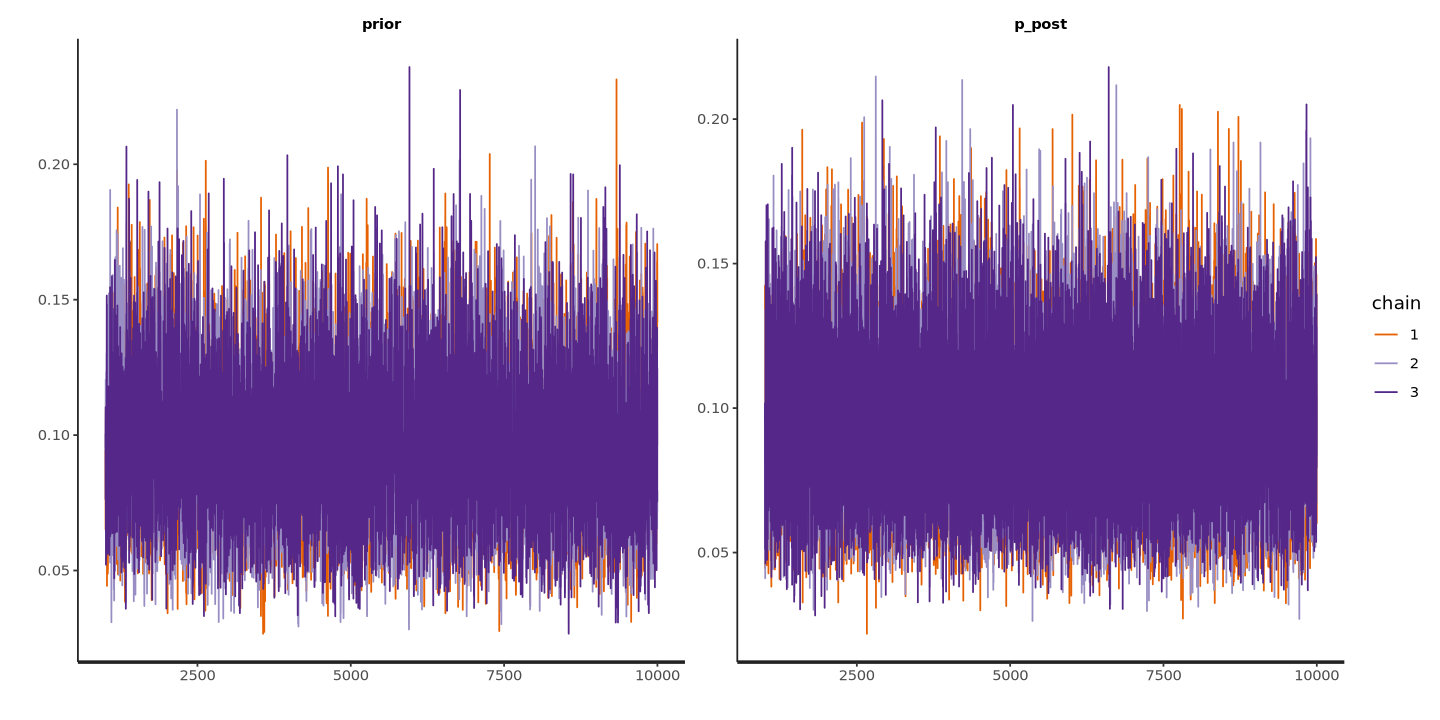

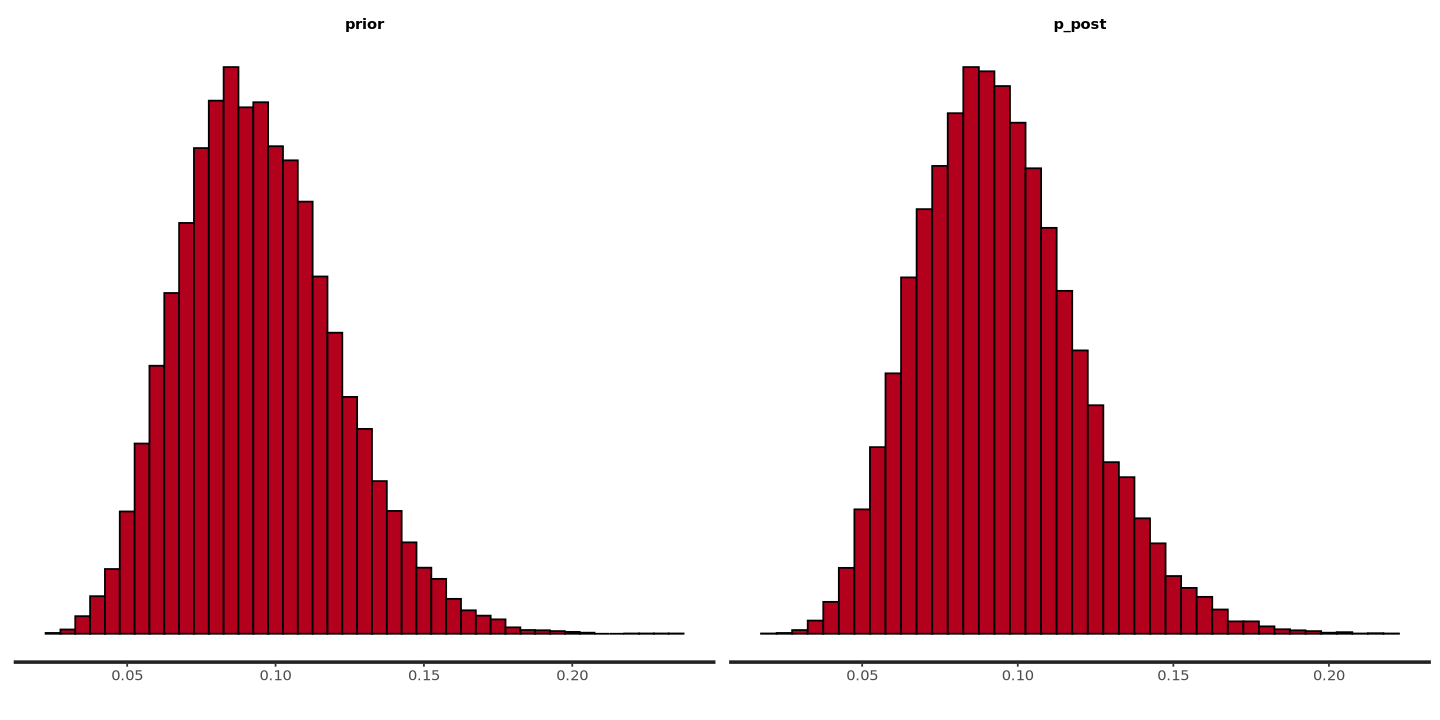

In [232]:
N <- 116
y <- 11
data_list <- list(N = N, y = y) # Data list for Stan
model <- stan_model("binom_beta.stan")
stanFit <- sampling(object = model, data = data_list, chains = 3, iter = 10000, warmup = 1000, thin = 1)
stan_trace(stanFit)   
stan_hist(stanFit, binwidth = 0.005 )    